In [1]:
import os
import pandas as pd
import numpy as np
from scipy.stats import spearmanr, kendalltau
from datetime import datetime

# Función para calcular las correlaciones de Spearman y Kendall
def calculate_correlations(original_data, imputed_data):
    spearman_corr, _ = spearmanr(original_data, imputed_data)
    kendall_corr, _ = kendalltau(original_data, imputed_data)
    return spearman_corr, kendall_corr

# Ruta al directorio base donde se encuentran las carpetas de cada técnica
base_directory = r"C:\Users\hctrl\OneDrive\Tesis\Experimento\Temperatura Media\Vacios Aleatorios"

# Carga de los datos originales
original_data_path = r"C:\\Users\\hctrl\\OneDrive\\Tesis\\Experimento\\Temperatura Media\\TempMedia.csv"
original_data = pd.read_csv(original_data_path)

# Conversión de la fecha a formato datetime y establecer como índice
original_data['Fecha'] = pd.to_datetime({'year': original_data['Anio'], 'month': original_data['Mes'], 'day': original_data['Dia']})
original_data.set_index('Fecha', inplace=True)

# Fechas de los datos imputados
missing_dates = [
    datetime(1986, 7, 9), datetime(1989, 10, 29), datetime(1994, 4, 15), datetime(1994, 8, 18), 
    datetime(1996, 1, 28), datetime(1996, 2, 7), datetime(1998, 12, 2), datetime(1998, 12, 17), 
    datetime(1999, 2, 24), datetime(2001, 7, 31), datetime(2002, 2, 14), datetime(2003, 6, 13), 
    datetime(2003, 8, 5), datetime(2004, 7, 11), datetime(2006, 10, 9)
]

# Preparar un DataFrame para guardar los resultados
correlation_results = []

# Diccionario para los nombres de las carpetas
technique_folders = {
    'Hot_Deck': 'Resultados_Imputacion_Hot_Deck',
    'IDW': 'Resultados_Imputacion_IDW',
    'KNN': 'Resultados_Imputacion_KNN',
    'Razon_Normal': 'Resultados_Imputacion_Razon_Normal',
    'WKNNI': 'Resultados_Imputacion_WKNNI',
    'ID': 'Resultados_Imputados_ID'
}

# Iterar sobre las carpetas de técnicas de imputación
for technique, folder_name in technique_folders.items():
    technique_path = os.path.join(base_directory, folder_name)
    
    # Iterar sobre los archivos CSV de imputación dentro de cada técnica
    for i in range(1, 16):
        file_name = f'TempMedia_imputado_{technique}_{i + 1}.csv'
        file_path = os.path.join(technique_path, file_name)
    
        # Verificar si el archivo existe
        if os.path.isfile(file_path):
            # Carga de los datos imputados
            imputed_data = pd.read_csv(file_path)
            imputed_data['Fecha'] = pd.to_datetime({'year': imputed_data['Anio'], 'month': imputed_data['Mes'], 'day': imputed_data['Dia']})
            imputed_data.set_index('Fecha', inplace=True)

            # Filtrar los datos originales y los imputados solo para la ID_CIDERH "M_022_A_II"
            original_sub = original_data[original_data['ID_CIDERH'] == 'M_022_A_II']
            imputed_sub = imputed_data[imputed_data['ID_CIDERH'] == 'M_022_A_II']

            # Filtrar los datos por las fechas específicas de datos faltantes
            original_missing = original_sub.loc[missing_dates]
            imputed_missing = imputed_sub.loc[missing_dates]

            # Calcular las correlaciones
            spearman_corr, kendall_corr = calculate_correlations(original_missing['TEMP_MEDIA_RBE'], imputed_missing['TEMP_MEDIA_RBE'])

            # Agregar los resultados a la lista
            correlation_results.append({
                'Technique': technique,
                'File': file_name,
                'Spearman': spearman_corr,
                'Kendall': kendall_corr
            })

# Convertir la lista de resultados en un DataFrame
correlation_results_df = pd.DataFrame(correlation_results)

# Guardar los resultados en un archivo CSV
results_csv_path = os.path.join(base_directory, 'correlations_results.csv')
correlation_results_df.to_csv(results_csv_path, index=False)

# Imprimir los resultados
print(correlation_results_df)

   Technique                               File  Spearman   Kendall
0   Hot_Deck  TempMedia_imputado_Hot_Deck_2.csv  0.996429  0.980952
1   Hot_Deck  TempMedia_imputado_Hot_Deck_3.csv  0.996429  0.980952
2   Hot_Deck  TempMedia_imputado_Hot_Deck_4.csv  0.985714  0.942857
3   Hot_Deck  TempMedia_imputado_Hot_Deck_5.csv  0.975000  0.904762
4   Hot_Deck  TempMedia_imputado_Hot_Deck_6.csv  0.964286  0.866667
..       ...                                ...       ...       ...
79        ID       TempMedia_imputado_ID_11.csv  0.860714  0.676190
80        ID       TempMedia_imputado_ID_12.csv  0.885714  0.714286
81        ID       TempMedia_imputado_ID_13.csv  0.882143  0.733333
82        ID       TempMedia_imputado_ID_14.csv  0.882143  0.733333
83        ID       TempMedia_imputado_ID_15.csv  0.900000  0.771429

[84 rows x 4 columns]


In [2]:
import pandas as pd

# Asegúrate de tener la ruta correcta al archivo CSV
df = pd.read_csv("correlations_results.csv")

# Calcular estadísticas descriptivas para Spearman y Kendall por técnica
descriptive_stats_spearman = df.groupby('Technique')['Spearman'].describe()
descriptive_stats_kendall = df.groupby('Technique')['Kendall'].describe()

# Calcular el IQR para Spearman y Kendall
descriptive_stats_spearman['IQR'] = descriptive_stats_spearman['75%'] - descriptive_stats_spearman['25%']
descriptive_stats_kendall['IQR'] = descriptive_stats_kendall['75%'] - descriptive_stats_kendall['25%']

# Medidas adicionales de Kurtosis y Skewness
descriptive_stats_spearman['Kurtosis'] = df.groupby('Technique')['Spearman'].apply(pd.Series.kurtosis)
descriptive_stats_spearman['Skewness'] = df.groupby('Technique')['Spearman'].skew()
descriptive_stats_kendall['Kurtosis'] = df.groupby('Technique')['Kendall'].apply(pd.Series.kurtosis)
descriptive_stats_kendall['Skewness'] = df.groupby('Technique')['Kendall'].skew()

print(descriptive_stats_spearman)
print(descriptive_stats_kendall)

              count      mean       std       min       25%       50%  \
Technique                                                               
Hot_Deck       14.0  0.947449  0.031988  0.910714  0.918750  0.939286   
ID             14.0  0.910459  0.044463  0.853571  0.882143  0.910714   
IDW            14.0  0.840051  0.063180  0.742857  0.815179  0.828571   
KNN            14.0  0.957653  0.030654  0.917857  0.926786  0.957143   
Razon_Normal   14.0  0.443367  0.348494 -0.153571  0.179464  0.562500   
WKNNI          14.0  0.970153  0.030518  0.925000  0.941071  0.985714   

                   75%       max       IQR  Kurtosis  Skewness  
Technique                                                       
Hot_Deck      0.972321  0.996429  0.053571 -1.515805  0.402170  
ID            0.928571  0.989286  0.046429 -0.642657  0.450328  
IDW           0.852679  0.978571  0.037500  1.474018  1.107282  
KNN           0.983929  1.000000  0.057143 -1.597844 -0.136319  
Razon_Normal  0.697321  0

C:\Users\hctrl\AppData\Local\Temp\ipykernel_15144\1500089497.py:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  spearman_cat_counts = correlation_results_df.groupby(['Technique', 'Spearman_Cat']).size().unstack().fillna(0)


<Figure size 800x400 with 0 Axes>

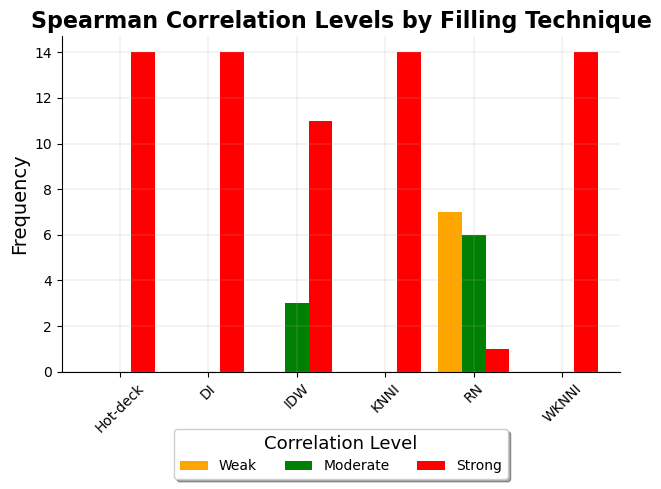

In [3]:
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv("correlations_results.csv")

# Correlaciones de spearman
#correlation_results_df['Spearman_Cat'] = pd.cut(correlation_results_df['Spearman'], bins=[0, 0.3, 0.6, 1], labels=['Weak', 'Moderate', 'Strong'])

correlation_results_df['Spearman_Cat'] = pd.cut(correlation_results_df['Spearman'], bins=[-np.inf, 0.5, 0.8, np.inf], labels=['Weak', 'Moderate', 'Strong'])

spearman_cat_counts = correlation_results_df.groupby(['Technique', 'Spearman_Cat']).size().unstack().fillna(0)

technique_names = {'Hot_Deck': 'Hot-deck', 'IDW': 'IDW', 'KNN': 'KNNI', 'ID': 'DI', 'Razon_Normal': 'RN', 'WKNNI': 'WKNNI'}
spearman_cat_counts.rename(index=technique_names, inplace=True)

# Plot
plt.figure(figsize=(8, 4))
spearman_cat_counts.plot(kind='bar', stacked=False, color=['orange', 'green', 'red'], width=0.8)
plt.title('Spearman Correlation Levels by Filling Technique', fontsize=16, fontweight='bold')
plt.xlabel('Filling Techniques', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.xticks(rotation=45) 

plt.tight_layout()  
plt.grid(linestyle='-', linewidth=0.2)

ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.legend(title='Correlation Level', fontsize=10, title_fontsize='13', loc='upper center', bbox_to_anchor=(0.5, -0.15), fancybox=True, shadow=True, ncol=3)
plt.show()

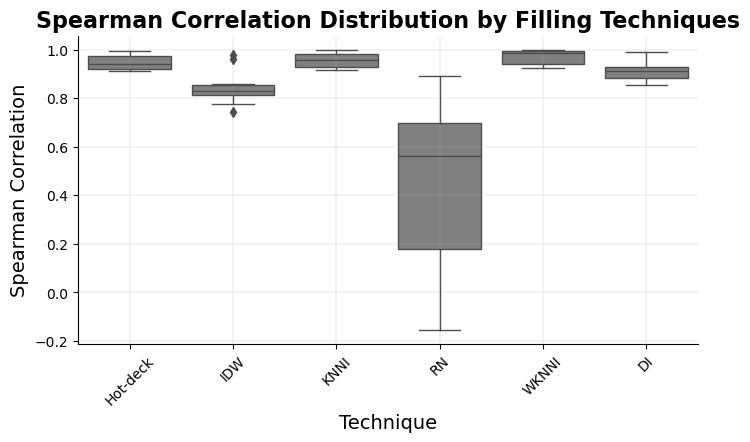

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("correlations_results.csv")

plt.figure(figsize=(8, 4))
boxplot = sns.boxplot(x='Technique', y='Spearman', data=df, color='gray', linewidth=1)

technique_names = ['Hot-deck', 'IDW', 'KNNI', 'RN', 'WKNNI', 'DI']

boxplot.set_xticklabels(technique_names)

plt.title('Spearman Correlation Distribution by Filling Techniques', fontsize=16, fontweight='bold')
plt.xlabel('Technique', fontsize=14)
plt.ylabel('Spearman Correlation', fontsize=14)
plt.xticks(fontsize=10, rotation=45)
plt.grid(linestyle='-', linewidth=0.2)
sns.despine()
plt.show()

C:\Users\hctrl\AppData\Local\Temp\ipykernel_15144\2984455168.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  kendall_cat_counts = correlation_results_df.groupby(['Technique', 'Kendall_Cat']).size().unstack().fillna(0)


<Figure size 800x400 with 0 Axes>

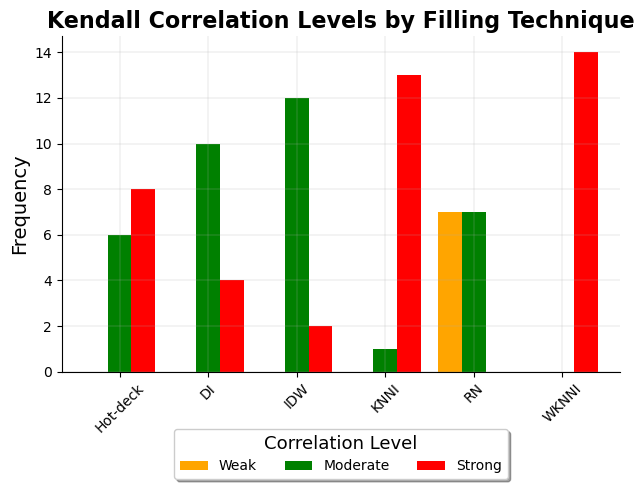

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

correlation_results_df = pd.read_csv("correlations_results.csv")

# Kendall correlation categorization
correlation_results_df['Kendall_Cat'] = pd.cut(correlation_results_df['Kendall'], bins=[-np.inf, 0.5, 0.8, np.inf], labels=['Weak', 'Moderate', 'Strong'])

kendall_cat_counts = correlation_results_df.groupby(['Technique', 'Kendall_Cat']).size().unstack().fillna(0)

technique_names = {'Hot_Deck': 'Hot-deck', 'IDW': 'IDW', 'KNN': 'KNNI', 'ID': 'DI', 'Razon_Normal': 'RN', 'WKNNI': 'WKNNI'}
kendall_cat_counts.rename(index=technique_names, inplace=True)

# Plot
plt.figure(figsize=(8, 4))
kendall_cat_counts.plot(kind='bar', stacked=False, color=['orange', 'green', 'red'], width=0.8)
plt.title('Kendall Correlation Levels by Filling Technique', fontsize=16, fontweight='bold')
plt.xlabel('Filling Techniques', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.xticks(rotation=45)

plt.tight_layout()
plt.grid(linestyle='-', linewidth=0.2)

ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.legend(title='Correlation Level', fontsize=10, title_fontsize='13', loc='upper center', bbox_to_anchor=(0.5, -0.15), fancybox=True, shadow=True, ncol=3)

# Display plot
plt.show()

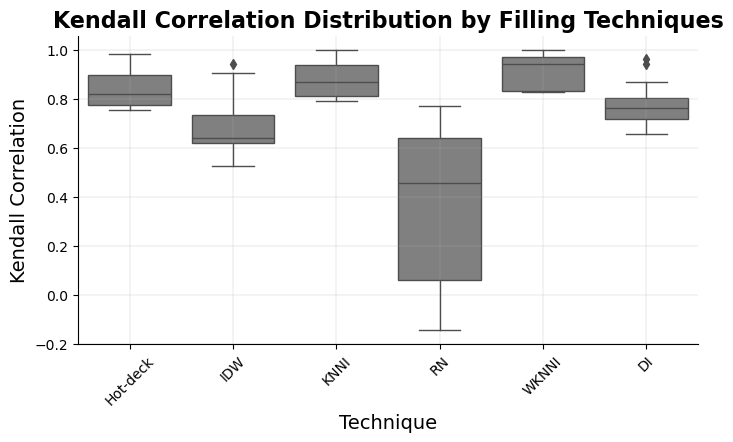

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("correlations_results.csv")

plt.figure(figsize=(8, 4))
boxplot = sns.boxplot(x='Technique', y='Kendall', data=df, color='gray', linewidth=1)

technique_names = ['Hot-deck', 'IDW', 'KNNI', 'RN', 'WKNNI', 'DI']

boxplot.set_xticklabels(technique_names)

plt.title('Kendall Correlation Distribution by Filling Techniques', fontsize=16, fontweight='bold')
plt.xlabel('Technique', fontsize=14)
plt.ylabel('Kendall Correlation', fontsize=14)
plt.xticks(fontsize=10, rotation=45)
plt.grid(linestyle='-', linewidth=0.2)
sns.despine()
plt.show()

In [1]:
import os
import pandas as pd
from datetime import datetime

# Función para calcular los errores residuales
def calculate_residual_errors(original_data, imputed_data):
    return (original_data - imputed_data).abs()

# Ruta al directorio base donde se encuentran las carpetas de cada técnica
base_directory = r"C:\Users\hctrl\OneDrive\Tesis\Experimento\Temperatura Media\Vacios Aleatorios"

# Carga de los datos originales
original_data_path = r"C:\Users\hctrl\OneDrive\Tesis\Experimento\Temperatura Media\TempMedia.csv"
original_data = pd.read_csv(original_data_path)
original_data['Fecha'] = pd.to_datetime({'year': original_data['Anio'], 'month': original_data['Mes'], 'day': original_data['Dia']})
original_data.set_index('Fecha', inplace=True)

# Asegúrate de filtrar los datos originales para la ID_CIDERH "M_022_A_II"
original_data = original_data[original_data['ID_CIDERH'] == 'M_022_A_II']

# Fechas de los datos imputados como datetime objects
missing_dates = [
    datetime(1986, 7, 9), datetime(1989, 10, 29), datetime(1994, 4, 15), datetime(1994, 8, 18), 
    datetime(1996, 1, 28), datetime(1996, 2, 7), datetime(1998, 12, 2), datetime(1998, 12, 17), 
    datetime(1999, 2, 24), datetime(2001, 7, 31), datetime(2002, 2, 14), datetime(2003, 6, 13), 
    datetime(2003, 8, 5), datetime(2004, 7, 11), datetime(2006, 10, 9)
]

# Preparar un DataFrame para guardar los errores residuales
residuals_results = []

# Diccionario para los nombres de las carpetas
technique_folders = {
    'Hot_Deck': 'Resultados_Imputacion_Hot_Deck',
    'IDW': 'Resultados_Imputacion_IDW',
    'KNN': 'Resultados_Imputacion_KNN',
    'Razon_Normal': 'Resultados_Imputacion_Razon_Normal',
    'WKNNI': 'Resultados_Imputacion_WKNNI',
    'ID': 'Resultados_Imputados_ID'
}

# Iterar sobre las carpetas de técnicas de imputación
for technique, folder_name in technique_folders.items():
    technique_path = os.path.join(base_directory, folder_name)
    
    # Iterar sobre los archivos CSV de imputación dentro de cada técnica
    for i in range(1, 16):
        file_name = f'TempMedia_imputado_{technique}_{i}.csv'
        file_path = os.path.join(technique_path, file_name)
    
        # Verificar si el archivo existe
        if os.path.isfile(file_path):
            # Carga de los datos imputados
            imputed_data = pd.read_csv(file_path)
            imputed_data['Fecha'] = pd.to_datetime({'year': imputed_data['Anio'], 'month': imputed_data['Mes'], 'day': imputed_data['Dia']})
            imputed_data.set_index('Fecha', inplace=True)

            # Filtrar los datos imputados solo para la ID_CIDERH "M_022_A_II"
            imputed_sub = imputed_data[imputed_data['ID_CIDERH'] == 'M_022_A_II']

            # Filtrar los datos por las fechas específicas de datos faltantes
            original_missing = original_data.loc[missing_dates]
            imputed_missing = imputed_sub.loc[missing_dates]

            # Calcular los errores residuales
            residual_errors = calculate_residual_errors(original_missing['TEMP_MEDIA_RBE'], imputed_missing['TEMP_MEDIA_RBE'])

            # Agregar los resultados a la lista
            residuals_results.append({
                'Technique': technique,
                'File': file_name,
                'Residual_Error': residual_errors.mean()  # Calculamos la media del error residual
            })

# Convertir la lista de errores residuales en un DataFrame
residuals_df = pd.DataFrame(residuals_results)

# Guardar los errores residuales en un archivo CSV
residuals_csv_path = os.path.join(base_directory, 'residuals_results.csv')
residuals_df.to_csv(residuals_csv_path, index=False)

# Calcular estadísticas descriptivas para los errores residuales
descriptive_stats_residuals = residuals_df.groupby('Technique')['Residual_Error'].describe()

# Calcular el IQR 
descriptive_stats_residuals['IQR'] = descriptive_stats_residuals['75%'] - descriptive_stats_residuals['25%']

# Agregar medidas de curtosis y asimetría
descriptive_stats_residuals['Kurtosis'] = residuals_df.groupby('Technique')['Residual_Error'].apply(pd.Series.kurtosis)
descriptive_stats_residuals['Skewness'] = residuals_df.groupby('Technique')['Residual_Error'].skew()

print(descriptive_stats_residuals)

              count      mean       std       min       25%       50%  \
Technique                                                               
Hot_Deck       15.0  0.892224  0.576290  0.112654  0.327378  0.931960   
ID             15.0  1.746382  1.115696  0.202591  0.751552  1.701904   
IDW            15.0  1.433725  0.798139  0.002401  0.917998  1.459602   
KNN            15.0  0.719016  0.420193  0.040253  0.352747  0.747758   
Razon_Normal   15.0  2.194301  1.249407  0.232855  1.220933  1.856121   
WKNNI          15.0  0.671617  0.450372  0.006800  0.229074  0.677294   

                   75%       max       IQR  Kurtosis  Skewness  
Technique                                                       
Hot_Deck      1.324345  1.717235  0.996967 -1.492154  0.008541  
ID            2.654064  3.375500  1.902512 -1.460944  0.070971  
IDW           1.938975  2.694948  1.020977 -0.736802 -0.107571  
KNN           1.058391  1.296992  0.705644 -1.254942 -0.089897  
Razon_Normal  3.022905  4

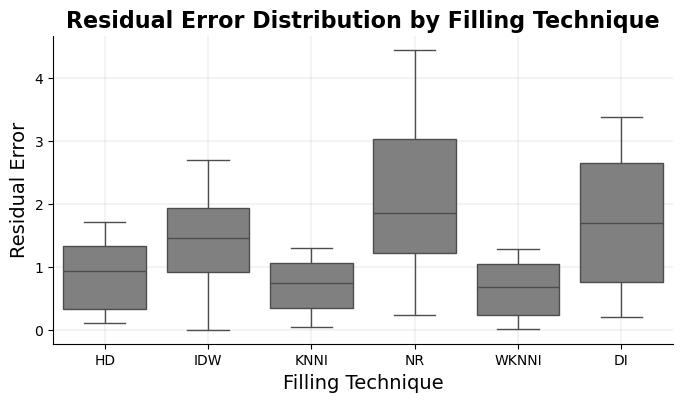

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

# Reemplazo de los nombres de las técnicas
new_names = {
    'Hot_Deck': 'HD',
    'IDW': 'IDW',
    'KNN': 'KNNI',
    'ID': 'DI',
    'Razon_Normal': 'NR',
    'WKNNI': 'WKNNI'
}

residuals_df['Technique'] = residuals_df['Technique'].replace(new_names)

plt.figure(figsize=(8, 4))
sns.boxplot(x='Technique', y='Residual_Error', data=residuals_df, color='gray', linewidth=1)
plt.grid(linestyle='-', linewidth=0.2)
plt.title('Residual Error Distribution by Filling Technique', fontsize=16, fontweight='bold')
plt.xlabel('Filling Technique', fontsize=14)
plt.ylabel('Residual Error', fontsize=14)
sns.despine()

# Guarda la imagen en formato .eps
plt.savefig('residuals_plot.eps', format='eps', bbox_inches='tight')

plt.show()

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


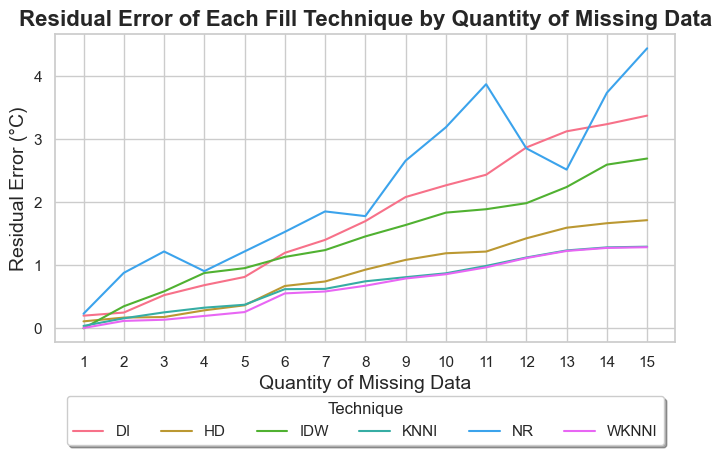

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

residuals_df = pd.read_csv('residuals_results.csv')

# Reemplazo de los nombres de las técnicas
new_names = {
    'Hot_Deck': 'HD',
    'IDW': 'IDW',
    'KNN': 'KNNI',
    'ID': 'DI',
    'Razon_Normal': 'NR',
    'WKNNI': 'WKNNI'
}

residuals_df['Technique'] = residuals_df['Technique'].replace(new_names)

residuals_df['Iteration'] = residuals_df['File'].str.extract(r'_(\d+)\.csv').astype(int)

pivot_df = residuals_df.pivot(index='Iteration', columns='Technique', values='Residual_Error')

# Define el estilo del gráfico
sns.set(style="whitegrid")

# Crea el gráfico de líneas con líneas continuas
plt.figure(figsize=(8, 4))

palette = sns.color_palette("husl", len(pivot_df.columns))

sns.lineplot(data=pivot_df, palette=palette, dashes=False)

# Añade título y etiquetas a los ejes
plt.title('Residual Error of Each Fill Technique by Quantity of Missing Data', fontsize=16, fontweight='bold')
plt.xlabel('Quantity of Missing Data', fontsize=14)
plt.ylabel('Residual Error (°C)', fontsize=14)

# Añade leyenda fuera del gráfico
plt.legend(title='Technique', loc='upper center', bbox_to_anchor=(0.5, -0.15), fancybox=True, shadow=True, ncol=len(pivot_df.columns))

plt.xticks(ticks=pivot_df.index, labels=pivot_df.index)

# Guarda la imagen en formato .eps
plt.savefig('residuals_plot.eps', format='eps', bbox_inches='tight')

# Muestra el gráfico
plt.show()